In [107]:
import subprocess
import sys

# Asegurar la instalación de pandas
# try:
import pandas as pd
# except ImportError:
#     print("pandas is not installed. Installing...")
#     subprocess.check_call([sys.executable, "-m", "pip", "install", "pandas", "--user"])
#     import pandas as pd

# Asegurar la instalación de matplotlib
# try:
import matplotlib.pyplot as plt
# except ImportError:
#     print("matplotlib is not installed. Installing...")
#     subprocess.check_call([sys.executable, "-m", "pip", "install", "matplotlib", "--user"])
#     import matplotlib.pyplot as plt

# Asegurar la instalación de ydata-profiling
# try:
#     from ydata_profiling import ProfileReport
# except ImportError:
#     print("ydata-profiling is not installed. Installing...")
#     subprocess.check_call([sys.executable, "-m", "pip", "install", "ydata-profiling", "--user"])
#     from ydata_profiling import ProfileReport
# try:
#     from sklearn.model_selection import train_test_split
# except ImportError:
#     print("sklearn was not installed. Installing now...")
#     subprocess.check_call([sys.executable, "-m", "pip", "install", "scikit-learn", "--user"])
from sklearn.model_selection import train_test_split    
# %pip install ydata-profiling
# %pip install ipywidgets
from sklearn.metrics import roc_auc_score, roc_curve


In [108]:
df = pd.read_csv('./data.csv')

In [109]:
df.drop(columns=df.columns[0], axis=1, inplace=True)

In [110]:
y = df['group']
X = df.drop(['group', 'Initial_EDSS','Final_EDSS'], axis=1)

In [118]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.5, random_state=100)

# Dividir X_temp y y_temp en conjuntos de validación y prueba
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=100)


ValueError: test_size=1 should be either positive and smaller than the number of samples 1 or a float in the (0, 1) range

In [ ]:
x_train_clean = X_train.dropna()
y_train_clean = y_train.loc[x_train_clean.index]

x_test_clean = X_test.dropna()
y_test_clean = y_test.loc[x_test_clean.index]

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_depth=2, random_state=100)
rf.fit(x_train_clean, y_train_clean)

RandomForestClassifier(max_depth=2, random_state=100)

In [ ]:
y_rf_train_pred = rf.predict(x_train_clean)
y_rf_test_pred = rf.predict(x_test_clean)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, accuracy_score, confusion_matrix, roc_auc_score, roc_curve
rf_train_mse = mean_squared_error(y_train_clean, y_rf_train_pred)
rf_train_r2 = r2_score(y_train_clean, y_rf_train_pred)
rf_test_mse = mean_squared_error(y_test_clean, y_rf_test_pred)
rf_test_r2 = r2_score(y_test_clean, y_rf_test_pred)

In [ ]:
rf_results = pd.DataFrame(['Random Forest', rf_train_mse, rf_train_r2, rf_test_mse, rf_test_r2]).transpose()
rf_results.columns = ['Method', 'Training MSE', 'Training R2', 'Test MSE', 'TEST R2']
rf_results

,Method,Training MSE,Training R2,Test MSE,TEST R2
0,Random Forest,0.176471,0.292741,0.205882,0.158267


Precisión en el conjunto de entrenamiento: 0.8051470588235294
Precisión en el conjunto de validación: 0.7794117647058824
Precisión en el conjunto de prueba: 0.7971014492753623
AUC-ROC: 0.8796861377506539
AUC-ROC: 0.8796861377506539


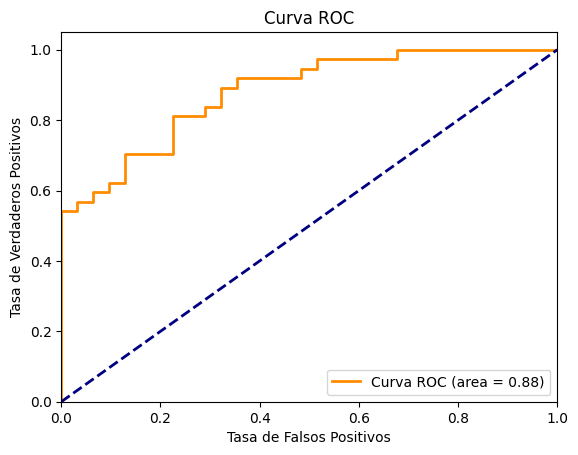

In [119]:
# Predecir las clases en los conjuntos de entrenamiento, validación y prueba
y_pred_train = rf.predict(X_train)
y_pred_val = rf.predict(X_val)
y_pred_test = rf.predict(X_test)

# Calcular la precisión en los conjuntos de entrenamiento, validación y prueba
accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_val = accuracy_score(y_val, y_pred_val)
accuracy_test = accuracy_score(y_test, y_pred_test)

print("Precisión en el conjunto de entrenamiento:", accuracy_train)
print("Precisión en el conjunto de validación:", accuracy_val)
print("Precisión en el conjunto de prueba:", accuracy_test)

# Calcular las probabilidades de las clases en el conjunto de validación
y_prob_val = rf.predict_proba(X_val)[:, 1]

# Calcular el AUC-ROC
auc_roc = roc_auc_score(y_val, y_prob_val)
print("AUC-ROC:", auc_roc)

# Convertir los valores de y_val a {0, 1}
y_val_binary = y_val.apply(lambda x: 0 if x == 1 else 1)

# Calcular el AUC-ROC
auc_roc = roc_auc_score(y_val_binary, y_prob_val)
print("AUC-ROC:", auc_roc)

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_val_binary, y_prob_val)

# Graficar la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (area = %0.2f)' % auc_roc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()